# Supervised Machine Learning - Image Processing

In this project, we explore the **MNIST** dataset, which contains handwritten digits. Our goal is to leverage supervised machine learning techniques by developing a **Random Forest Regression** model. This model will perform various operations on the image data to enhance clarity and improve overall image quality. 

Through this exploration, we aim to understand how effective machine learning algorithms can be applied to image processing tasks, specifically in recognizing and classifying handwritten digits.



In [1]:
# Importing primary libraries for numerical operations and data manipulation
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs

# Importing libraries for machine learning
from sklearn.datasets import load_digits  # Load the MNIST digits dataset
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier for model training

# Importing metrics for model evaluation
from sklearn.metrics import (
    confusion_matrix,  # Confusion matrix for evaluating classification results
    accuracy_score,    # Accuracy score for measuring the model's performance
    f1_score,          # F1 score for evaluating the balance between precision and recall
    recall_score,      # Recall score for measuring the ability to find all relevant instances
    precision_score    # Precision score for measuring the accuracy of positive predictions
)

# Load the MNIST digits dataset
digits = load_digits()

In [2]:
# Print the shape of the image data
# The dataset contains 1797 images, each represented as an 8x8 pixel grid, resulting in a total of 64 features (pixels)
print("Image Data Shape:", digits.data.shape)

# Print the shape of the label data
# The dataset contains 1797 corresponding labels, which are integers ranging from 0 to 9, representing the digit each image depicts
print("Label Data Shape:", digits.target.shape)


Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


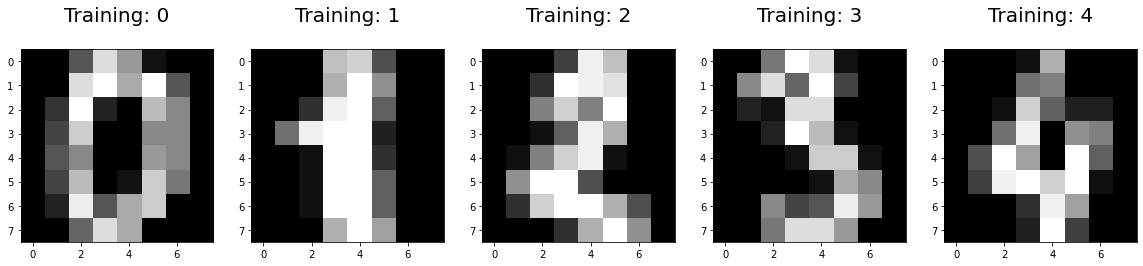

In [3]:
# Create a figure to display the images
# Setting the figure size to be wide (20x4) to accommodate multiple images side by side
plt.figure(figsize=(20, 4))

# Loop through the first 5 images and their corresponding labels
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    # Create a subplot for each image
    # '1, 5' specifies a grid of 1 row and 5 columns; 'index + 1' positions the current image in the subplot
    plt.subplot(1, 5, index + 1)
    
    # Reshape the 1D image array into a 2D array (8x8) for proper visualization
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    
    # Set the title of each subplot to show the corresponding label
    # The label indicates the digit represented by the image
    plt.title('Training: %i\n' % label, fontsize=20)


#### Splitting the Data into Training and Test Sets

In this step, we divide the dataset into two distinct subsets: the training set and the test set. The training set will be used to train and fine-tune our model, ensuring it generalizes well to new, unseen data. Once the model is trained, we evaluate its performance using the test set, which the model has not encountered during training. This approach helps us assess how effectively the model can make predictions in real-world scenarios.


In [4]:
# Select feature data and target labels
X = digits.data  # Feature data: pixel values of the images
y = digits.target  # Target labels: corresponding digit labels (0-9)

# Split the dataset into training and test sets
# The training set will be used to train the model, while the test set will evaluate its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Random Forest Classification Model: Parameter Tuning

#### Selecting the Tuning Parameters

In this phase, we will focus on optimizing the `max_depth` parameter of the Random Forest model, as it significantly influences the model's performance. Typically, increasing the `max_depth` enhances the model's accuracy up to a certain point, after which further increases may lead to overfitting or minimal improvement. By carefully tuning this parameter, we aim to determine the optimal `max_depth` that maximizes the model’s accuracy.

To assess the model's effectiveness, we will compare the accuracy score derived from predictions on the test set against the accuracy achieved during training on the training set. This will help us evaluate the model's ability to generalize to new, unseen data.


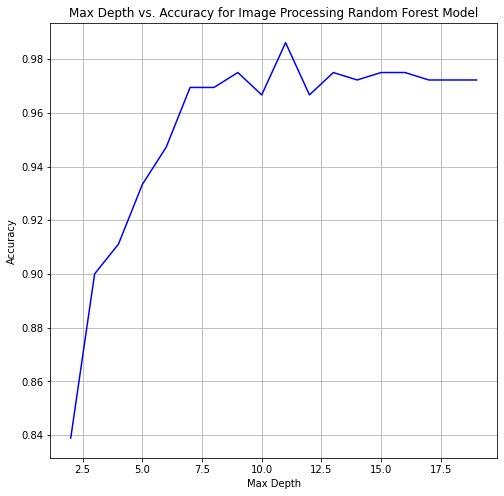

As seen in the plot above, the optimum max_depth value is 11, which allows the model to achieve the highest accuracy of 0.99. A max_depth value of 11 should be used for testing on the test set.


In [5]:
# Define the range of max_depth values to evaluate model accuracy
depths = range(2, 20, 1)

# Initialize an empty list to store accuracy scores
acc = []

# Iterate over each depth value to assess model performance
for d in depths:
    # Create and fit the Random Forest Classifier with specified parameters
    forest = RandomForestClassifier(n_estimators=100, random_state=4, max_depth=d)
    forest.fit(X_train, y_train)
    
    # Calculate the accuracy score on the test set
    score = forest.score(X_test, y_test)
    
    # Append the score to the accuracy list
    acc.append(score)

# Plot to visualize how accuracy score changes with max_depth values
plt.figure(figsize=(8, 8))
plt.plot(depths, acc, 'b')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs. Accuracy for Image Processing Random Forest Model')
plt.grid()  # Optional: Add grid for better readability
plt.show()

# Determine the optimum max_depth and its corresponding accuracy score
opt_acc = max(acc)  # Get the maximum accuracy score
opt_acc_ind = acc.index(opt_acc)  # Get the index of the optimum accuracy score

# Retrieve the optimum max_depth using the index of the optimum accuracy score
opt_d = depths[opt_acc_ind]

# Print the optimum max_depth and its associated accuracy
print(f"As seen in the plot above, the optimum max_depth value is {opt_d}, "
      f"which allows the model to achieve the highest accuracy of {round(opt_acc, 2)}. "
      f"A max_depth value of {opt_d} should be used for testing on the test set.")


### Visualization of the Confusion Matrix

The confusion matrix provides a comprehensive view of the model's performance by illustrating the true positive, true negative, false positive, and false negative predictions. This matrix helps us evaluate how well the model classifies the handwritten digits and identifies areas for improvement.


In [6]:
# Create a Random Forest model with the optimal max_depth and fit it to the training data
forest = RandomForestClassifier(n_estimators=100, random_state=4, max_depth=11)
forest.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = forest.predict(X_test).reshape(-1, 1)

# Compute the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(f"Confusion matrix:\n\n{cm}")


Confusion matrix:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


The model exhibits the most significant difficulties in accurately predicting the classes '1', '3', '4', '5', and '7'. These classes show a higher frequency of misclassifications, indicating areas where the model may require further refinement or additional data to enhance its predictive performance.

### Evaluation Metrics: Accuracy, Precision, Recall, and F1-Score

In this section, we will analyze the model's performance using key evaluation metrics: accuracy, precision, recall, and F1-score. These metrics provide a comprehensive understanding of the model's effectiveness in classifying the handwritten digits. While accuracy gives an overall performance measure, precision and recall offer insights into the model's ability to correctly identify positive instances for each class. The F1-score, which balances precision and recall, serves as a useful measure for evaluating the model's performance, particularly when dealing with imbalanced classes.


In [7]:
# Calculate and print evaluation metrics
print(f'''
Accuracy:  {accuracy_score(y_test, y_pred)}
Precision: {precision_score(y_test, y_pred, average='macro')}
Recall:    {recall_score(y_test, y_pred, average='macro')}
F1 Score:  {f1_score(y_test, y_pred, average='macro')}
''')



Accuracy:  0.9861111111111112
Precision: 0.9880141080822573
Recall:    0.9866328446272126
F1 Score:  0.9872554124131143



### Model Evaluation Metrics

The evaluation metrics for the model are as follows:

- **Accuracy: 0.9861 (98.61%)**: This indicates that the model correctly classified approximately 98.61% of the test data, suggesting a strong overall performance.

- **Precision: 0.9880 (98.80%)**: This metric shows that when the model predicts a positive class (i.e., a specific digit), it is correct about 98.80% of the time. This high precision indicates that the model makes very few false positive errors.

- **Recall: 0.9866 (98.66%)**: This value reveals that the model successfully identifies approximately 98.66% of all actual positive cases. The recall is high, indicating that the model effectively captures the relevant classes without missing many true positives.

- **F1 Score: 0.9873 (98.73%)**: The F1 score combines precision and recall into a single metric, balancing both concerns. A score of 98.73% indicates that the model performs well in terms of both precision and recall, making it a robust choice for classification tasks.

Overall, these metrics demonstrate that the model is highly effective at classifying handwritten digits, with excellent accuracy and a strong balance between precision and recall. This performance suggests that the random forest classifier is well-suited for the task at hand.
